In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygame
import seaborn as sns
import random

# our classes
from agent import Agent, SARSALambdaAgent
from environment import Environment
from screen import Screen

pygame 2.0.0 (SDL 2.0.12, python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# define environment
ACTION_SPACE = np.eye(3)
NUM_ACTIONS = 3
NUM_STATES = 2 ** 11

In [3]:
# Set options to activate or deactivate the game view, and its speed
pygame.font.init()

In [4]:
def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['episodes'])
    for i in range(n):
        episode = metrics['episodes'][i]
        score = metrics['scores'][i]
        reward = metrics['rewards'][i]

        formatted_dict['episodes'].append(episode)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(episode)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)


def decode_state(encoded_state):
    """
    Decode a binary representation of a state into its decimal base;
    
    encoded_state: an array of 0s and 1s representing a binary value
    
    return: decimal value
    """
    decoded = ''
    for s in encoded_state:
        decoded += str(s)

    return int(decoded, 2)


def decode_action(encoded_action):
    if isinstance(encoded_action, np.ndarray):
        return encoded_action.argmax()
    return encoded_action


In [5]:
def default_reward(env):
    """
    Return the reward.
    The reward is:
        -10 when Snake crashes.
        +10 when Snake eats food
        0 otherwise
    """
    reward = 0
    if env.game.crash:
        reward = -10
    elif env.player.eaten:
        reward = 10

    return reward

In [6]:
def run_sarsa(agent: SARSALambdaAgent, reward_function, episodes, display, speed, verbose=True):
    # setting random seed
    random.seed(42)
    np.random.seed(42)

    if display:
        pygame.init()

    env = Environment(440, 440, reward_function)
    screen = Screen(env)

    episode = 0
    metrics = {'episodes': [],
               'scores': [],
               'rewards': []}
    start = time.time()
    while episode < episodes:
        if display:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()
                    
            screen.display()
        agent.reset_E()
        state1, done = env.reset()
        state1 = decode_state(state1)
        action1 = agent.choose_action(state1)
        episode_reward = 0
        while not done:
            # Getting the next state, reward
            state2, reward, done = env.step(action1)
            state2 = decode_state(state2)
            # Choosing the next action
            action2 = agent.choose_action(state2)

            # Learning the Q-value
            decoded_action1 = decode_action(action1)
            decoded_action2 = decode_action(action2)
            agent.update(state1, state2, reward, decoded_action1, decoded_action2)

            state1 = state2
            action1 = action2
            episode_reward += reward

            if display:
                screen.display()
                pygame.time.wait(speed)
            
            end = time.time()
            diff = end - start
            if diff > 600: # 10min
                break

        episode += 1
        if verbose:
            print(f'Game {episode}      Score: {env.game.score}')

        mean_reward = episode_reward/episodes
        metrics['episodes'].append(episode)
        metrics['rewards'].append(mean_reward)
        metrics['scores'].append(env.game.score)
        
        end = time.time()
        diff = end - start
        if diff > 600: # 10min
            break
        

    return metrics

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 1
Game 8      Score: 0
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 0
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 1
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 2
Game 32      Score: 1
Game 33      Score: 2
Game 34      Score: 4
Game 35      Score: 3
Game 36      Score: 4
Game 37      Score: 5
Game 38      Score: 1
Game 39      Score: 1
Game 40      Score: 1
Game 41      Score: 3
Game 42      Score: 1
Game 43      Score: 4
Game 44      Score: 1
Game 45      Score: 3
Game 46      Score:

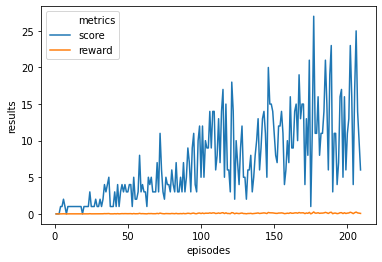

Run time: 600.4808416366577 seconds
Max. Score: 27
Mean Last Scores: 12.56


In [7]:
# N0 = 1, gamma = 1, lambda = 0

N0 = 1
gamma = 1

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 1
Game 8      Score: 0
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 0
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 1
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 2
Game 32      Score: 1
Game 33      Score: 2
Game 34      Score: 4
Game 35      Score: 3
Game 36      Score: 4
Game 37      Score: 5
Game 38      Score: 1
Game 39      Score: 1
Game 40      Score: 1
Game 41      Score: 3
Game 42      Score: 1
Game 43      Score: 4
Game 44      Score: 1
Game 45      Score: 3
Game 46      Score:

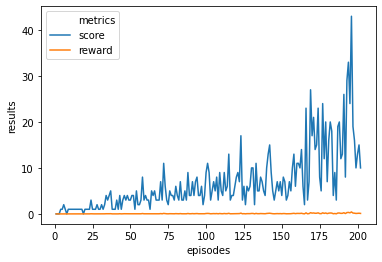

Run time: 600.4014828205109 seconds
Max. Score: 43
Mean Last Scores: 14.16


In [8]:
# N0 = 1, gamma = 1, lambda = 0.2

N0 = 1
gamma = 1

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0.2

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 1
Game 8      Score: 0
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 0
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 1
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 2
Game 32      Score: 1
Game 33      Score: 2
Game 34      Score: 4
Game 35      Score: 3
Game 36      Score: 4
Game 37      Score: 5
Game 38      Score: 1
Game 39      Score: 1
Game 40      Score: 1
Game 41      Score: 3
Game 42      Score: 1
Game 43      Score: 4
Game 44      Score: 1
Game 45      Score: 3
Game 46      Score:

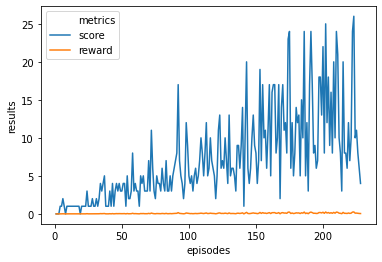

Run time: 600.4205539226532 seconds
Max. Score: 26
Mean Last Scores: 12.64


In [7]:
# N0 = 1, gamma = 1, lambda = 0.5

N0 = 1
gamma = 1

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0.5

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 1
Game 8      Score: 0
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 0
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 1
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 2
Game 32      Score: 1
Game 33      Score: 2
Game 34      Score: 4
Game 35      Score: 3
Game 36      Score: 4
Game 37      Score: 5
Game 38      Score: 1
Game 39      Score: 1
Game 40      Score: 1
Game 41      Score: 3
Game 42      Score: 1
Game 43      Score: 4
Game 44      Score: 1
Game 45      Score: 3
Game 46      Score:

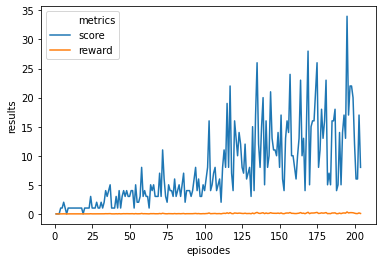

Run time: 600.4121458530426 seconds
Max. Score: 34
Mean Last Scores: 13.92


In [7]:
# N0 = 1, gamma = 1, lambda = 0.7

N0 = 1
gamma = 1

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0.7

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 1
Game 5      Score: 1
Game 6      Score: 2
Game 7      Score: 1
Game 8      Score: 0
Game 9      Score: 1
Game 10      Score: 1
Game 11      Score: 1
Game 12      Score: 1
Game 13      Score: 1
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 0
Game 20      Score: 1
Game 21      Score: 1
Game 22      Score: 1
Game 23      Score: 1
Game 24      Score: 3
Game 25      Score: 1
Game 26      Score: 1
Game 27      Score: 1
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 2
Game 32      Score: 1
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 5
Game 36      Score: 3
Game 37      Score: 3
Game 38      Score: 1
Game 39      Score: 2
Game 40      Score: 1
Game 41      Score: 3
Game 42      Score: 3
Game 43      Score: 3
Game 44      Score: 4
Game 45      Score: 8
Game 46      Score:

Game 362      Score: 4
Game 363      Score: 3
Game 364      Score: 2
Game 365      Score: 4
Game 366      Score: 2
Game 367      Score: 3
Game 368      Score: 1
Game 369      Score: 3
Game 370      Score: 2
Game 371      Score: 5
Game 372      Score: 2
Game 373      Score: 2
Game 374      Score: 2
Game 375      Score: 2
Game 376      Score: 7
Game 377      Score: 1
Game 378      Score: 8
Game 379      Score: 1
Game 380      Score: 3
Game 381      Score: 0
Game 382      Score: 0
Game 383      Score: 0
Game 384      Score: 0
Game 385      Score: 0
Game 386      Score: 0
Game 387      Score: 0
Game 388      Score: 0
Game 389      Score: 1
Game 390      Score: 2
Game 391      Score: 1
Game 392      Score: 0
Game 393      Score: 3
Game 394      Score: 3
Game 395      Score: 0
Game 396      Score: 0
Game 397      Score: 0
Game 398      Score: 0
Game 399      Score: 0
Game 400      Score: 0
Game 401      Score: 0
Game 402      Score: 0
Game 403      Score: 0
Game 404      Score: 0
Game 405   

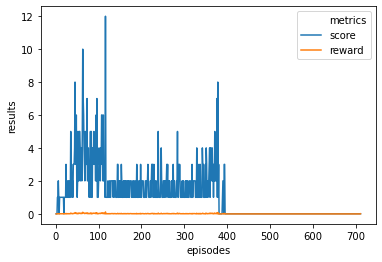

Run time: 600.4186170101166 seconds
Max. Score: 12
Mean Last Scores: 0.0


In [7]:
# N0 = 1, gamma = 1, lambda = 1

N0 = 1
gamma = 1

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 1

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 0
Game 22      Score: 1
Game 23      Score: 0
Game 24      Score: 1
Game 25      Score: 2
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 3
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 0
Game 37      Score: 2
Game 38      Score: 1
Game 39      Score: 4
Game 40      Score: 0
Game 41      Score: 2
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 1
Game 45      Score: 1
Game 46      Score:

Game 360      Score: 4
Game 361      Score: 7
Game 362      Score: 4
Game 363      Score: 10
Game 364      Score: 2
Game 365      Score: 16
Game 366      Score: 8
Game 367      Score: 2
Game 368      Score: 10
Game 369      Score: 12
Game 370      Score: 3
Game 371      Score: 1
Game 372      Score: 21
Game 373      Score: 12
Game 374      Score: 4
Game 375      Score: 2
Game 376      Score: 3
Game 377      Score: 6
Game 378      Score: 5
Game 379      Score: 6
Game 380      Score: 10
Game 381      Score: 2
Game 382      Score: 5
Game 383      Score: 5
Game 384      Score: 10
Game 385      Score: 2
Game 386      Score: 6
Game 387      Score: 13
Game 388      Score: 4
Game 389      Score: 8
Game 390      Score: 2
Game 391      Score: 5
Game 392      Score: 4
Game 393      Score: 16
Game 394      Score: 8
Game 395      Score: 11
Game 396      Score: 7
Game 397      Score: 6
Game 398      Score: 4
Game 399      Score: 5
Game 400      Score: 8
Game 401      Score: 7
Game 402      Score: 11

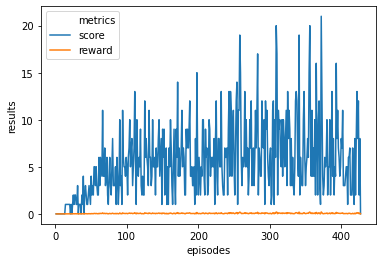

Run time: 600.4187524318695 seconds
Max. Score: 21
Mean Last Scores: 5.82


In [7]:
# N0 = 1, gamma = 0.99, lambda = 0

N0 = 1
gamma = 0.99

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 0
Game 22      Score: 1
Game 23      Score: 0
Game 24      Score: 1
Game 25      Score: 2
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 3
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 0
Game 37      Score: 2
Game 38      Score: 1
Game 39      Score: 4
Game 40      Score: 0
Game 41      Score: 2
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 1
Game 45      Score: 1
Game 46      Score:

Game 360      Score: 2
Game 361      Score: 9
Game 362      Score: 11
Game 363      Score: 7
Game 364      Score: 3
Game 365      Score: 7
Game 366      Score: 9
Game 367      Score: 13
Game 368      Score: 8
Game 369      Score: 7
Game 370      Score: 7
Game 371      Score: 1
Game 372      Score: 16
Game 373      Score: 4
Game 374      Score: 6
Game 375      Score: 10
Game 376      Score: 6
Game 377      Score: 7
Game 378      Score: 14
Game 379      Score: 12
Game 380      Score: 10
Game 381      Score: 13
Game 382      Score: 6
Game 383      Score: 2
Game 384      Score: 12
Game 385      Score: 7
Game 386      Score: 8
Game 387      Score: 4
Game 388      Score: 7
Game 389      Score: 3
Game 390      Score: 9
Game 391      Score: 2
Game 392      Score: 5
Game 393      Score: 13
Game 394      Score: 8
Game 395      Score: 3
Game 396      Score: 12
Game 397      Score: 9
Game 398      Score: 9
Game 399      Score: 3
Game 400      Score: 4
Game 401      Score: 10
Game 402      Score: 1

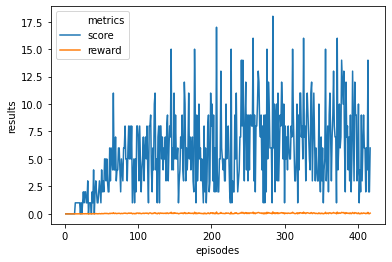

Run time: 600.0256345272064 seconds
Max. Score: 18
Mean Last Scores: 6.78


In [8]:
# N0 = 1, gamma = 0.99, lambda = 0.2

N0 = 1
gamma = 0.99

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0.2

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 0
Game 22      Score: 1
Game 23      Score: 0
Game 24      Score: 1
Game 25      Score: 2
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 3
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 0
Game 37      Score: 2
Game 38      Score: 1
Game 39      Score: 4
Game 40      Score: 0
Game 41      Score: 2
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 1
Game 45      Score: 1
Game 46      Score:

Game 360      Score: 6
Game 361      Score: 7
Game 362      Score: 8
Game 363      Score: 14
Game 364      Score: 5
Game 365      Score: 2
Game 366      Score: 11
Game 367      Score: 11
Game 368      Score: 11
Game 369      Score: 13
Game 370      Score: 9
Game 371      Score: 11
Game 372      Score: 3
Game 373      Score: 3
Game 374      Score: 11
Game 375      Score: 7
Game 376      Score: 2
Game 377      Score: 2
Game 378      Score: 4
Game 379      Score: 3
Game 380      Score: 5
Game 381      Score: 3
Game 382      Score: 2
Game 383      Score: 12
Game 384      Score: 14
Game 385      Score: 4
Game 386      Score: 5
Game 387      Score: 5
Game 388      Score: 3
Game 389      Score: 9
Game 390      Score: 6
Game 391      Score: 10
Game 392      Score: 13
Game 393      Score: 6
Game 394      Score: 14
Game 395      Score: 2
Game 396      Score: 1
Game 397      Score: 13
Game 398      Score: 1
Game 399      Score: 2
Game 400      Score: 20
Game 401      Score: 6
Game 402      Score:

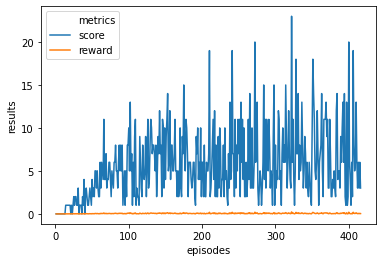

Run time: 600.0605189800262 seconds
Max. Score: 23
Mean Last Scores: 6.74


In [9]:
# N0 = 1, gamma = 0.99, lambda = 0.5

N0 = 1
gamma = 0.99

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0.5

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 0
Game 22      Score: 1
Game 23      Score: 0
Game 24      Score: 1
Game 25      Score: 2
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 3
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 0
Game 37      Score: 2
Game 38      Score: 1
Game 39      Score: 4
Game 40      Score: 0
Game 41      Score: 2
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 1
Game 45      Score: 1
Game 46      Score:

Game 360      Score: 13
Game 361      Score: 8
Game 362      Score: 10
Game 363      Score: 4
Game 364      Score: 14
Game 365      Score: 1
Game 366      Score: 3
Game 367      Score: 8
Game 368      Score: 8
Game 369      Score: 13
Game 370      Score: 8
Game 371      Score: 5
Game 372      Score: 3
Game 373      Score: 5
Game 374      Score: 9
Game 375      Score: 4
Game 376      Score: 3
Game 377      Score: 4
Game 378      Score: 5
Game 379      Score: 6
Game 380      Score: 4
Game 381      Score: 5
Game 382      Score: 5
Game 383      Score: 18
Game 384      Score: 14
Game 385      Score: 12
Game 386      Score: 6
Game 387      Score: 11
Game 388      Score: 11
Game 389      Score: 2
Game 390      Score: 12
Game 391      Score: 4
Game 392      Score: 3
Game 393      Score: 2
Game 394      Score: 9
Game 395      Score: 9
Game 396      Score: 1
Game 397      Score: 9
Game 398      Score: 16
Game 399      Score: 2
Game 400      Score: 11
Game 401      Score: 5
Game 402      Score: 8

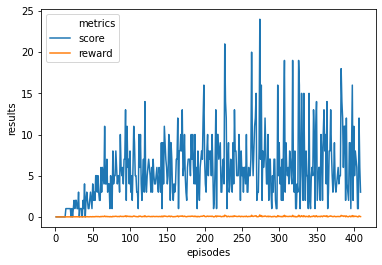

Run time: 600.0506541728973 seconds
Max. Score: 24
Mean Last Scores: 6.98


In [10]:
# N0 = 1, gamma = 0.99, lambda = 0.7

N0 = 1
gamma = 0.99

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0.7

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 0
Game 22      Score: 1
Game 23      Score: 0
Game 24      Score: 1
Game 25      Score: 2
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 3
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 0
Game 37      Score: 2
Game 38      Score: 1
Game 39      Score: 4
Game 40      Score: 0
Game 41      Score: 2
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 1
Game 45      Score: 1
Game 46      Score:

Game 362      Score: 2
Game 363      Score: 2
Game 364      Score: 1
Game 365      Score: 2
Game 366      Score: 1
Game 367      Score: 3
Game 368      Score: 1
Game 369      Score: 6
Game 370      Score: 9
Game 371      Score: 10
Game 372      Score: 12
Game 373      Score: 4
Game 374      Score: 4
Game 375      Score: 3
Game 376      Score: 4
Game 377      Score: 1
Game 378      Score: 9
Game 379      Score: 3
Game 380      Score: 6
Game 381      Score: 9
Game 382      Score: 5
Game 383      Score: 5
Game 384      Score: 4
Game 385      Score: 4
Game 386      Score: 3
Game 387      Score: 2
Game 388      Score: 3
Game 389      Score: 2
Game 390      Score: 4
Game 391      Score: 4
Game 392      Score: 6
Game 393      Score: 4
Game 394      Score: 1
Game 395      Score: 1
Game 396      Score: 3
Game 397      Score: 1
Game 398      Score: 10
Game 399      Score: 1
Game 400      Score: 3
Game 401      Score: 5
Game 402      Score: 8
Game 403      Score: 1
Game 404      Score: 7
Game 405

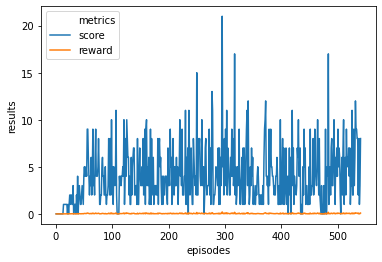

Run time: 600.0485706329346 seconds
Max. Score: 21
Mean Last Scores: 5.38


In [11]:
# N0 = 1, gamma = 0.99, lambda = 1

N0 = 1
gamma = 0.99

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 1

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 0
Game 22      Score: 1
Game 23      Score: 0
Game 24      Score: 1
Game 25      Score: 2
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 3
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 0
Game 37      Score: 2
Game 38      Score: 1
Game 39      Score: 4
Game 40      Score: 0
Game 41      Score: 2
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 1
Game 45      Score: 1
Game 46      Score:

Game 360      Score: 4
Game 361      Score: 17
Game 362      Score: 10
Game 363      Score: 15
Game 364      Score: 12
Game 365      Score: 9
Game 366      Score: 9
Game 367      Score: 11
Game 368      Score: 11
Game 369      Score: 7
Game 370      Score: 2
Game 371      Score: 9
Game 372      Score: 11
Game 373      Score: 3
Game 374      Score: 11
Game 375      Score: 3
Game 376      Score: 4
Game 377      Score: 6
Game 378      Score: 8
Game 379      Score: 6
Game 380      Score: 2
Game 381      Score: 5
Game 382      Score: 17
Game 383      Score: 12
Game 384      Score: 1
Game 385      Score: 5
Game 386      Score: 11
Game 387      Score: 2
Game 388      Score: 11
Game 389      Score: 8
Game 390      Score: 8
Game 391      Score: 21
Game 392      Score: 8
Game 393      Score: 11
Game 394      Score: 3
Game 395      Score: 17
Game 396      Score: 3
Game 397      Score: 3
Game 398      Score: 2
Game 399      Score: 2
Game 400      Score: 2
Game 401      Score: 16
Game 402      Scor

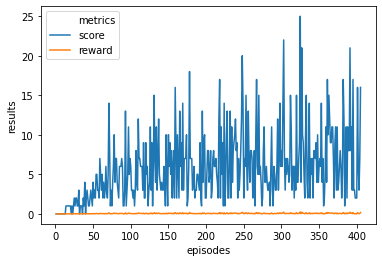

Run time: 600.0417575836182 seconds
Max. Score: 25
Mean Last Scores: 7.78


In [12]:
# N0 = 1, gamma = 0.5, lambda = 0

N0 = 1
gamma = 0.5

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 0
Game 22      Score: 1
Game 23      Score: 0
Game 24      Score: 1
Game 25      Score: 2
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 3
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 0
Game 37      Score: 2
Game 38      Score: 1
Game 39      Score: 4
Game 40      Score: 0
Game 41      Score: 2
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 1
Game 45      Score: 1
Game 46      Score:

Game 360      Score: 4
Game 361      Score: 17
Game 362      Score: 10
Game 363      Score: 15
Game 364      Score: 12
Game 365      Score: 9
Game 366      Score: 9
Game 367      Score: 11
Game 368      Score: 11
Game 369      Score: 7
Game 370      Score: 2
Game 371      Score: 9
Game 372      Score: 9
Game 373      Score: 18
Game 374      Score: 5
Game 375      Score: 4
Game 376      Score: 7
Game 377      Score: 7
Game 378      Score: 3
Game 379      Score: 5
Game 380      Score: 12
Game 381      Score: 8
Game 382      Score: 15
Game 383      Score: 2


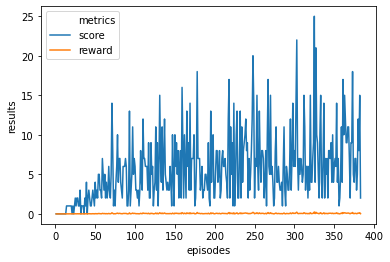

Run time: 600.0444340705872 seconds
Max. Score: 25
Mean Last Scores: 7.48


In [13]:
# N0 = 1, gamma = 0.5, lambda = 0.2

N0 = 1
gamma = 0.5

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0.2

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 0
Game 22      Score: 1
Game 23      Score: 0
Game 24      Score: 1
Game 25      Score: 2
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 3
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 0
Game 37      Score: 2
Game 38      Score: 1
Game 39      Score: 4
Game 40      Score: 0
Game 41      Score: 2
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 1
Game 45      Score: 1
Game 46      Score:

Game 360      Score: 17
Game 361      Score: 10
Game 362      Score: 3
Game 363      Score: 12
Game 364      Score: 6
Game 365      Score: 7
Game 366      Score: 10
Game 367      Score: 10
Game 368      Score: 2
Game 369      Score: 2
Game 370      Score: 4
Game 371      Score: 9
Game 372      Score: 6
Game 373      Score: 2
Game 374      Score: 9
Game 375      Score: 5
Game 376      Score: 6
Game 377      Score: 7
Game 378      Score: 8
Game 379      Score: 3
Game 380      Score: 17
Game 381      Score: 5
Game 382      Score: 6
Game 383      Score: 12
Game 384      Score: 9
Game 385      Score: 6
Game 386      Score: 3
Game 387      Score: 11
Game 388      Score: 12
Game 389      Score: 8
Game 390      Score: 13
Game 391      Score: 4
Game 392      Score: 3
Game 393      Score: 6
Game 394      Score: 12
Game 395      Score: 11
Game 396      Score: 8
Game 397      Score: 6
Game 398      Score: 3
Game 399      Score: 4
Game 400      Score: 7
Game 401      Score: 3
Game 402      Score: 3

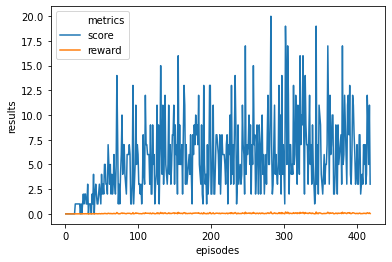

Run time: 600.0243332386017 seconds
Max. Score: 20
Mean Last Scores: 6.54


In [14]:
# N0 = 1, gamma = 0.5, lambda = 0.5

N0 = 1
gamma = 0.5

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0.5

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 0
Game 22      Score: 1
Game 23      Score: 0
Game 24      Score: 1
Game 25      Score: 2
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 3
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 0
Game 37      Score: 2
Game 38      Score: 1
Game 39      Score: 4
Game 40      Score: 0
Game 41      Score: 2
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 1
Game 45      Score: 1
Game 46      Score:

Game 360      Score: 10
Game 361      Score: 11
Game 362      Score: 4
Game 363      Score: 8
Game 364      Score: 8
Game 365      Score: 6
Game 366      Score: 10
Game 367      Score: 7
Game 368      Score: 7
Game 369      Score: 8
Game 370      Score: 4
Game 371      Score: 9
Game 372      Score: 8
Game 373      Score: 2
Game 374      Score: 5
Game 375      Score: 5
Game 376      Score: 7
Game 377      Score: 8
Game 378      Score: 2
Game 379      Score: 19
Game 380      Score: 8
Game 381      Score: 12
Game 382      Score: 11
Game 383      Score: 10
Game 384      Score: 17
Game 385      Score: 3
Game 386      Score: 18
Game 387      Score: 6
Game 388      Score: 6
Game 389      Score: 6
Game 390      Score: 4
Game 391      Score: 2
Game 392      Score: 9
Game 393      Score: 13
Game 394      Score: 17
Game 395      Score: 6
Game 396      Score: 8
Game 397      Score: 13
Game 398      Score: 7


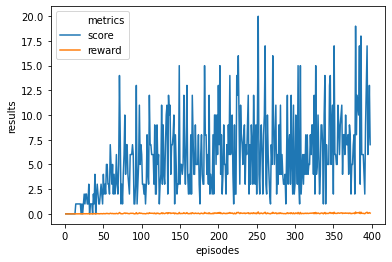

Run time: 600.0361106395721 seconds
Max. Score: 20
Mean Last Scores: 8.22


In [15]:
# N0 = 1, gamma = 0.5, lambda = 0.7

N0 = 1
gamma = 0.5

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 0.7

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))

Game 1      Score: 0
Game 2      Score: 0
Game 3      Score: 0
Game 4      Score: 0
Game 5      Score: 0
Game 6      Score: 0
Game 7      Score: 0
Game 8      Score: 0
Game 9      Score: 0
Game 10      Score: 0
Game 11      Score: 0
Game 12      Score: 0
Game 13      Score: 0
Game 14      Score: 1
Game 15      Score: 1
Game 16      Score: 1
Game 17      Score: 1
Game 18      Score: 1
Game 19      Score: 1
Game 20      Score: 1
Game 21      Score: 0
Game 22      Score: 1
Game 23      Score: 0
Game 24      Score: 1
Game 25      Score: 2
Game 26      Score: 1
Game 27      Score: 2
Game 28      Score: 2
Game 29      Score: 1
Game 30      Score: 1
Game 31      Score: 3
Game 32      Score: 0
Game 33      Score: 1
Game 34      Score: 1
Game 35      Score: 1
Game 36      Score: 0
Game 37      Score: 2
Game 38      Score: 1
Game 39      Score: 4
Game 40      Score: 0
Game 41      Score: 2
Game 42      Score: 3
Game 43      Score: 2
Game 44      Score: 1
Game 45      Score: 1
Game 46      Score:

Game 360      Score: 5
Game 361      Score: 6
Game 362      Score: 9
Game 363      Score: 10
Game 364      Score: 11
Game 365      Score: 7
Game 366      Score: 5
Game 367      Score: 3
Game 368      Score: 7
Game 369      Score: 10
Game 370      Score: 10
Game 371      Score: 5
Game 372      Score: 4
Game 373      Score: 6
Game 374      Score: 5
Game 375      Score: 4
Game 376      Score: 8
Game 377      Score: 9
Game 378      Score: 2
Game 379      Score: 2
Game 380      Score: 9
Game 381      Score: 6
Game 382      Score: 8
Game 383      Score: 2
Game 384      Score: 8
Game 385      Score: 11
Game 386      Score: 12
Game 387      Score: 4
Game 388      Score: 13
Game 389      Score: 12
Game 390      Score: 8
Game 391      Score: 1
Game 392      Score: 2
Game 393      Score: 7
Game 394      Score: 3
Game 395      Score: 19
Game 396      Score: 10
Game 397      Score: 2
Game 398      Score: 5
Game 399      Score: 10
Game 400      Score: 6
Game 401      Score: 6
Game 402      Score: 6


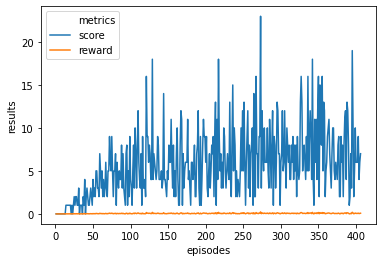

Run time: 600.0298070907593 seconds
Max. Score: 23
Mean Last Scores: 7.02


In [16]:
# N0 = 1, gamma = 0.5, lambda = 1

N0 = 1
gamma = 0.5

# define agent
sarsaAgent = SARSALambdaAgent(N0, gamma, NUM_STATES, NUM_ACTIONS, ACTION_SPACE)
sarsaAgent.lambda_value = 1

start = time.time()
metrics = run_sarsa(sarsaAgent, reward_function=default_reward, episodes=1000, speed=0, display=False)
end = time.time()

plot_metrics(metrics, filepath=None)

print('Run time:', (end-start), 'seconds')
print('Max. Score:', max(metrics['scores']))
print('Mean Last Scores:', np.mean(metrics['scores'][-50:]))